In [ ]:
%matplotlib nbagg
import sys
import os
import time
sys.path.append("..")
# 自分のpath
os.chdir("/home/nakamura/HAI/main_server/hai")

import pymongo
from PIL import Image
from matplotlib import pylab as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation
import numpy as np
from bson.objectid import ObjectId
from sklearn.decomposition import PCA

from _app import app
from database import mongo
# from notebook.utils.utils import visualize

In [ ]:
app.config['PORT_DB']

In [63]:
def display_latest_image():
    # only display latest image
    images = mongo.images.find({"cam_id": "webcam0"}, sort=[("_id", pymongo.DESCENDING)])
    im = images.next()
    display_image(im)

def display_image(im):
    print_time(im['time'])  
    plt.imshow(Image.open(app.config['RAW_IMG_DIR'] + im['filename']))
    
def print_time(t):
    print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t)))

2017-11-03 11:32:12


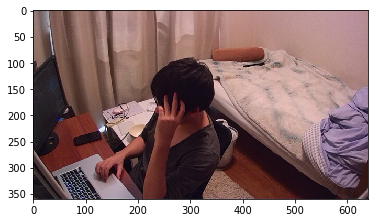

In [87]:
%matplotlib inline
display_latest_image()

In [122]:
prints = mongo.print.find({"user_name": "koki", 'time': {"$gt": 1509675690.059450}, 
                           "$or": [{"text": "play"}, {"text": 'study'}, {'text': 'sleep'}]}, sort=[("_id", pymongo.ASCENDING)])

In [120]:
list(prints)

[{'_id': ObjectId('59fbd2aa1d41c82c66cc152b'),
  'text': 'play',
  'time': 1509675690.0594504,
  'user_name': 'koki'},
 {'_id': ObjectId('59fbd4f31d41c82c66cc1772'),
  'text': 'study',
  'time': 1509676275.6991415,
  'user_name': 'koki'}]

play
2017-11-03 11:21:30


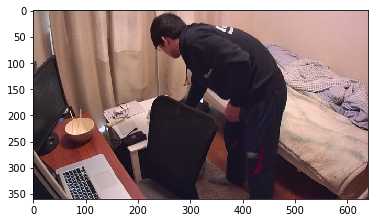

In [123]:
p = prints.next()
print(p['text'])
# im = mongo.images.find({'time': {"$gt": p['time']}, "cam_id": "webcam1"}, sort=[("_id", pymongo.ASCENDING)]).next()
im = mongo.images.find({'time': {"$gt": p['time']}, "cam_id": "webcam0"}, sort=[("_id", pymongo.ASCENDING)]).next()
display_image(im)

In [92]:
hue_cols = mongo.hue.find(sort=[("_id", pymongo.DESCENDING)])
hue_col = hue_cols.next()
print_time(hue_col['time'])

2017-11-03 11:32:34


In [66]:
# images = mongo.images.find({'time': {"$gt": 1509519607.0138}}, sort=[("_id", pymongo.ASCENDING)])

In [41]:
# import shutil
# for im in images:
#     shutil.copy(app.config['RAW_IMG_DIR'] + im['filename'], './pose_tmp/' + im['filename'])

In [25]:
images0 = mongo.images.find({'time': {"$gt": 1509519607.0138}, "cam_id": "webcam0"}, sort=[("_id", pymongo.ASCENDING)])
images1 = mongo.images.find({'time': {"$gt": 1509519607.0138}, "cam_id": "webcam1"}, sort=[("_id", pymongo.ASCENDING)])